# 🔮 Importaciones necesarias para el proyecto

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
print(f"Versión de TensorFlow: {tf.__version__}")
print(f"Versión de OpenCV: {cv2.__version__}")

Versión de TensorFlow: 2.1.0
Versión de OpenCV: 4.6.0


In [5]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## 📂 Configuraciones del path para lectura

In [2]:
# Obtenemos la dirección actual del path donde se está ejecutando el Jupyter Notebook
cwd = os.getcwd()
# Nos movemos a la carpeta donde se encuentran las imágenes a testear
os.chdir(f"{cwd}/clasificador/")
# Verificamos que nos encontramos en el path correcto
print(os.getcwd())
principal_directory = os.getcwd()

e:\Traffic-Sign-Classifier\clasificador


In [3]:
# Listamos los archivos de la ruta
print(os.listdir())

['pare', 'semaforo', 'velocidad']


# 🧐 Lectura de imágenes

In [4]:
# principal_directory = 'C:\\Users\\USER\\Desktop\\PDI\\Clasificador'

images = []

shape_mayor = None
shape_menor = None

# Itera sobre las carpetas dentro del directorio principal
for folder in os.listdir(principal_directory):
    folder_path = os.path.join(principal_directory, folder)
    
    # Verifica si el elemento en el directorio es una carpeta
    if os.path.isdir(folder_path):
        
        # Itera sobre los archivos dentro de la carpeta
        for file in os.listdir(folder_path):
            archivo_path = os.path.join(folder_path, file)
            
            # Lee la imagen con OpenCV y la agrega a la lista
            image = cv2.imread(archivo_path)
            altura, ancho, canales = image.shape
    
            if shape_mayor is None or (altura * ancho) > (shape_mayor[0] * shape_mayor[1]):
                shape_mayor = (altura, ancho, canales)
            
            if shape_menor is None or (altura * ancho) < (shape_menor[0] * shape_menor[1]):
                shape_menor = (altura, ancho, canales)
            
            # Convertir la imagen al espacio de color RGB desde BGR (formato por defecto de OpenCV)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            # Redimensiona la imagen a (752, 1024)
            resized_img = cv2.resize(image, (752, 1024))
            # Normaliza los valores de la imagen de 0 a 1
            normalized_img = resized_img / 255.0
            images.append(normalized_img)

print("Tamaño Mayor antes del resize: ", shape_mayor)
print("Tamaño Menor antes del resize: ", shape_menor)
index = np.random.randint(0, len(images))
print("Tamaño después del resize: ", images[index].shape)

print("Pixeles de la imagen antes de la normalización: ", images[index][5][5] * 255)
print("Pixeles de la imagen después de la normalización: ", images[index][5][5])

Tamaño Mayor antes del resize:  (4640, 3472, 3)
Tamaño Menor antes del resize:  (4000, 1756, 3)
Tamaño después del resize:  (1024, 752, 3)
Pixeles de la imagen antes de la normalización:  [254. 254. 254.]
Pixeles de la imagen después de la normalización:  [0.99607843 0.99607843 0.99607843]


In [9]:
# Subir un nivel en el explorador de archivos
#os.chdir("..")
#print(os.getcwd())

e:\


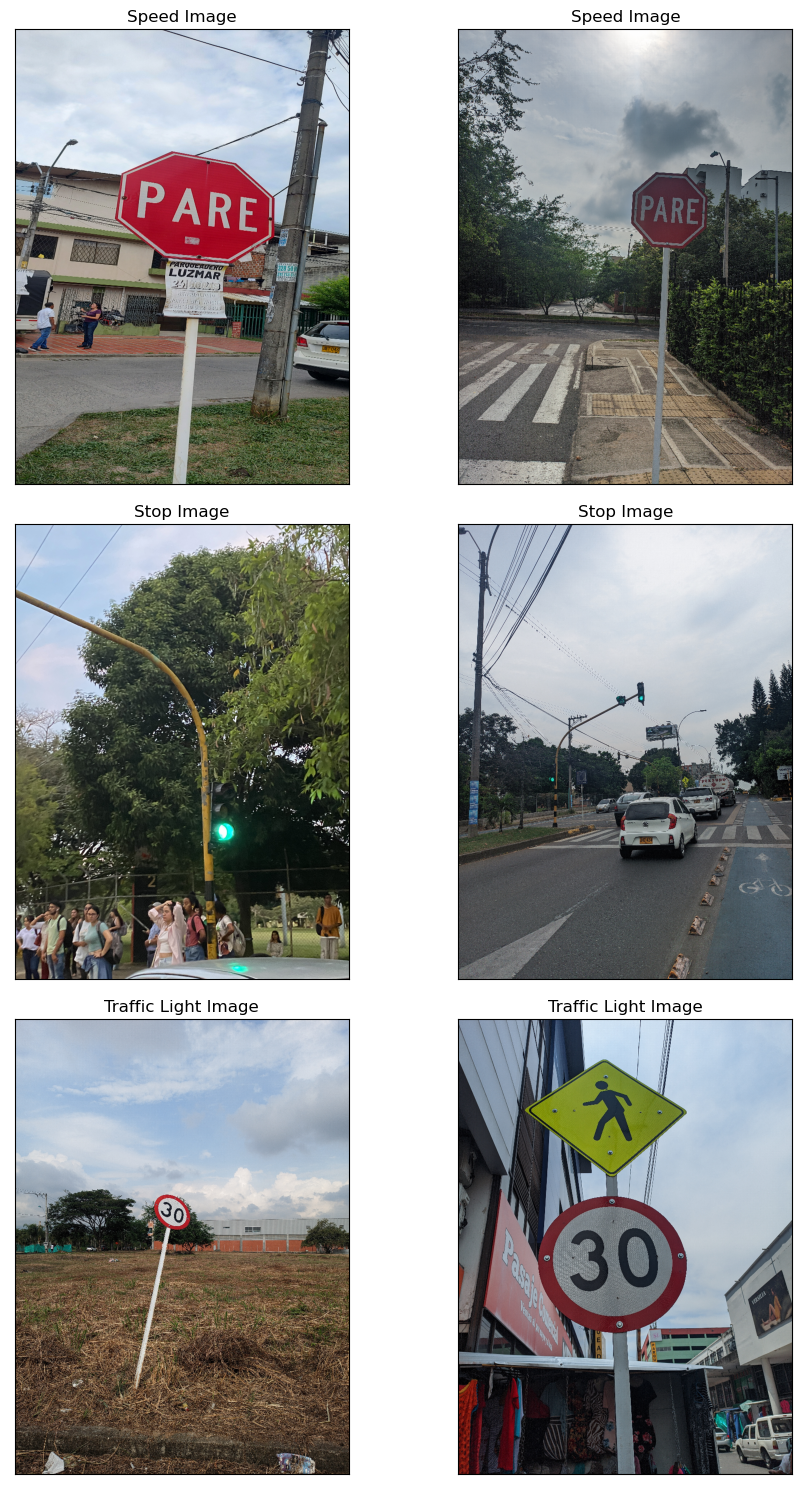

In [5]:
# Inicializa la figura
plt.figure(figsize=(10, 15))

index = np.random.randint(0, 125)
plt.subplot(3, 2, 1), plt.imshow(images[index])
plt.gca().set_title('Speed Image')
plt.xticks([]), plt.yticks([])

index = np.random.randint(0, 125)
plt.subplot(3, 2, 2), plt.imshow(images[index])
plt.gca().set_title('Speed Image')
plt.xticks([]), plt.yticks([])

index = np.random.randint(125, 250)
plt.subplot(3, 2, 3), plt.imshow(images[index])
plt.gca().set_title('Stop Image')
plt.xticks([]), plt.yticks([])

index = np.random.randint(125, 250)
plt.subplot(3, 2, 4), plt.imshow(images[index])
plt.gca().set_title('Stop Image')
plt.xticks([]), plt.yticks([])

index = np.random.randint(250, 375)
plt.subplot(3, 2, 5), plt.imshow(images[index])
plt.gca().set_title('Traffic Light Image')
plt.xticks([]), plt.yticks([])

index = np.random.randint(250, 375)
plt.subplot(3, 2, 6), plt.imshow(images[index])
plt.gca().set_title('Traffic Light Image')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()